In [1]:
# Working ADANI Stock Prediction Model
# Simple but effective approach for Google Colab

# Install required packages first
import subprocess
import sys

def install_packages():
    """Install required packages"""
    packages = [
        'yfinance',
        'plotly',
        'scikit-learn',
        'tensorflow'
    ]

    for package in packages:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✅ {package} installed successfully")
        except:
            print(f"❌ Failed to install {package}")

# Uncomment the line below if packages are not installed
# install_packages()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Try importing optional packages
try:
    import yfinance as yf
    YF_AVAILABLE = True
except ImportError:
    YF_AVAILABLE = False
    print("⚠️ yfinance not available. Please install it: pip install yfinance")

try:
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.preprocessing import StandardScaler
    SKLEARN_AVAILABLE = True
except ImportError:
    SKLEARN_AVAILABLE = False
    print("⚠️ scikit-learn not available. Please install it: pip install scikit-learn")

try:
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    PLOTLY_AVAILABLE = True
except ImportError:
    PLOTLY_AVAILABLE = False
    print("⚠️ plotly not available. Please install it: pip install plotly")

# ================================
# 1. SIMPLE DATA COLLECTOR
# ================================

class SimpleAdaniCollector:
    def __init__(self):
        # ADANI GROUP STOCKS
        self.adani_stocks = {
            'ADANIPORTS': 'ADANIPORTS.NS',      # Adani Ports & SEZ
            'ADANIENT': 'ADANIENT.NS',          # Adani Enterprises
            'ADANIGREEN': 'ADANIGREEN.NS',      # Adani Green Energy
            'ADANIPOWER': 'ADANIPOWER.NS',      # Adani Power
            'ADANITRANS': 'ADANITRANS.NS',      # Adani Transmission
            'ATGL': 'ATGL.NS',                  # Adani Total Gas
            'AWL': 'AWL.NS',                    # Adani Wilmar
            'ACC': 'ACC.NS',                    # ACC Cement (Adani acquired)
            'AMBUJACEM': 'AMBUJACEM.NS',        # Ambuja Cement (Adani acquired)
        }

        # TOP INDIAN STOCKS (NIFTY 50 MAJOR COMPANIES)
        self.top_indian_stocks = {
            # Technology
            'TCS': 'TCS.NS',                    # Tata Consultancy Services
            'INFY': 'INFY.NS',                  # Infosys
            'HCLTECH': 'HCLTECH.NS',            # HCL Technologies
            'WIPRO': 'WIPRO.NS',                # Wipro
            'TECHM': 'TECHM.NS',                # Tech Mahindra

            # Banking & Finance
            'HDFCBANK': 'HDFCBANK.NS',          # HDFC Bank
            'ICICIBANK': 'ICICIBANK.NS',        # ICICI Bank
            'AXISBANK': 'AXISBANK.NS',          # Axis Bank
            'KOTAKBANK': 'KOTAKBANK.NS',        # Kotak Mahindra Bank
            'SBIN': 'SBIN.NS',                  # State Bank of India
            'BAJFINANCE': 'BAJFINANCE.NS',      # Bajaj Finance
            'HDFCLIFE': 'HDFCLIFE.NS',          # HDFC Life Insurance

            # Automobile
            'MARUTI': 'MARUTI.NS',              # Maruti Suzuki
            'TATAMOTORS': 'TATAMOTORS.NS',      # Tata Motors
            'M&M': 'M&M.NS',                    # Mahindra & Mahindra
            'BAJAJ-AUTO': 'BAJAJ-AUTO.NS',      # Bajaj Auto
            'HEROMOTOCO': 'HEROMOTOCO.NS',      # Hero MotoCorp

            # Oil & Gas
            'RELIANCE': 'RELIANCE.NS',          # Reliance Industries
            'ONGC': 'ONGC.NS',                  # Oil & Natural Gas Corp
            'IOC': 'IOC.NS',                    # Indian Oil Corporation
            'BPCL': 'BPCL.NS',                  # Bharat Petroleum

            # Pharmaceuticals
            'SUNPHARMA': 'SUNPHARMA.NS',        # Sun Pharmaceutical
            'DRREDDY': 'DRREDDY.NS',            # Dr. Reddy's Labs
            'CIPLA': 'CIPLA.NS',                # Cipla
            'APOLLOHOSP': 'APOLLOHOSP.NS',      # Apollo Hospitals

            # FMCG & Consumer
            'HINDUNILVR': 'HINDUNILVR.NS',      # Hindustan Unilever
            'ITC': 'ITC.NS',                    # ITC Limited
            'NESTLE': 'NESTLEIND.NS',           # Nestle India
            'BRITANNIA': 'BRITANNIA.NS',        # Britannia Industries
            'DABUR': 'DABUR.NS',                # Dabur India

            # Metals & Mining
            'TATASTEEL': 'TATASTEEL.NS',        # Tata Steel
            'JSWSTEEL': 'JSWSTEEL.NS',          # JSW Steel
            'HINDALCO': 'HINDALCO.NS',          # Hindalco Industries
            'COALINDIA': 'COALINDIA.NS',        # Coal India
            'VEDL': 'VEDL.NS',                  # Vedanta Limited

            # Cement
            'ULTRACEMCO': 'ULTRACEMCO.NS',      # UltraTech Cement
            'SHREECEM': 'SHREECEM.NS',          # Shree Cement
            'GRASIM': 'GRASIM.NS',              # Grasim Industries

            # Telecom
            'BHARTIARTL': 'BHARTIARTL.NS',      # Bharti Airtel
            'IDEA': 'IDEA.NS',                  # Vodafone Idea (Vi)

            # Retail & E-commerce
            'DMART': 'DMART.NS',                # Avenue Supermarts (D-Mart)
            'TRENT': 'TRENT.NS',                # Trent (Westside, Zudio)

            # Power & Utilities
            'NTPC': 'NTPC.NS',                  # NTPC Limited
            'POWERGRID': 'POWERGRID.NS',        # Power Grid Corporation

            # Diversified Conglomerates
            'LT': 'LT.NS',                      # Larsen & Toubro
            'ITC': 'ITC.NS',                    # ITC Limited
        }

        # GLOBAL STOCKS (Popular US stocks via Yahoo Finance)
        self.global_stocks = {
            # Technology Giants
            'APPLE': 'AAPL',                    # Apple Inc.
            'MICROSOFT': 'MSFT',                # Microsoft Corporation
            'GOOGLE': 'GOOGL',                  # Alphabet (Google)
            'AMAZON': 'AMZN',                   # Amazon.com
            'TESLA': 'TSLA',                    # Tesla Inc.
            'META': 'META',                     # Meta (Facebook)
            'NETFLIX': 'NFLX',                  # Netflix
            'NVIDIA': 'NVDA',                   # NVIDIA Corporation
            'ADOBE': 'ADBE',                    # Adobe Inc.

            # Traditional Companies
            'BERKSHIRE': 'BRK-A',               # Berkshire Hathaway
            'JOHNSON': 'JNJ',                   # Johnson & Johnson
            'WALMART': 'WMT',                   # Walmart Inc.
            'COCACOLA': 'KO',                   # The Coca-Cola Company
            'DISNEY': 'DIS',                    # The Walt Disney Company
            'MCDONALD': 'MCD',                  # McDonald's Corporation

            # Financial
            'JPMORGAN': 'JPM',                  # JPMorgan Chase & Co.
            'BANKOFAMERICA': 'BAC',             # Bank of America
            'VISA': 'V',                        # Visa Inc.
            'MASTERCARD': 'MA',                 # Mastercard Inc.
        }

        # MARKET INDICES
        self.market_indices = {
            # Indian Indices
            'NIFTY50': '^NSEI',                 # Nifty 50
            'SENSEX': '^BSESN',                 # BSE Sensex
            'BANKNIFTY': '^NSEBANK',            # Bank Nifty
            'NIFTYIT': '^CNXIT',                # Nifty IT
            'NIFTYPHARMA': '^CNXPHARMA',        # Nifty Pharma

            # Global Indices
            'SP500': '^GSPC',                   # S&P 500
            'NASDAQ': '^IXIC',                  # NASDAQ Composite
            'DOWJONES': '^DJI',                 # Dow Jones Industrial Average
            'VIX': '^VIX',                      # CBOE Volatility Index
        }

        # CRYPTOCURRENCY (if supported)
        self.crypto_symbols = {
            'BITCOIN': 'BTC-USD',               # Bitcoin
            'ETHEREUM': 'ETH-USD',              # Ethereum
            'CARDANO': 'ADA-USD',               # Cardano
            'POLYGON': 'MATIC-USD',             # Polygon
        }

    def get_all_available_stocks(self):
        """Get complete list of all available stocks"""
        all_stocks = {}

        all_stocks.update({"🏢 ADANI GROUP": self.adani_stocks})
        all_stocks.update({"🇮🇳 TOP INDIAN STOCKS": self.top_indian_stocks})
        all_stocks.update({"🌍 GLOBAL STOCKS": self.global_stocks})
        all_stocks.update({"📊 MARKET INDICES": self.market_indices})
        all_stocks.update({"₿ CRYPTOCURRENCY": self.crypto_symbols})

        return all_stocks

    def print_all_stocks(self):
        """Print all available stocks in organized format"""
        all_stocks = self.get_all_available_stocks()

        print("🚀 COMPLETE STOCK LIST FOR ANALYSIS")
        print("=" * 80)

        for category, stocks in all_stocks.items():
            print(f"\n{category}")
            print("-" * 40)
            for name, symbol in stocks.items():
                print(f"  {name:<20} -> {symbol}")

        print(f"\n📊 TOTAL AVAILABLE: {sum(len(stocks) for stocks in all_stocks.values())} stocks")

        return all_stocks

    def get_stock_data(self, stock_name='ADANIPORTS', period='2y'):
        """Enhanced stock data fetcher with multiple categories"""
        if not YF_AVAILABLE:
            print("❌ yfinance not available. Cannot fetch data.")
            return self._create_dummy_data()

        # Search across all categories
        symbol = None
        found_category = None

        # Search in ADANI stocks first
        if stock_name.upper() in self.adani_stocks:
            symbol = self.adani_stocks[stock_name.upper()]
            found_category = "ADANI"

        # Search in Indian stocks
        elif stock_name.upper() in self.top_indian_stocks:
            symbol = self.top_indian_stocks[stock_name.upper()]
            found_category = "INDIAN"

        # Search in Global stocks
        elif stock_name.upper() in self.global_stocks:
            symbol = self.global_stocks[stock_name.upper()]
            found_category = "GLOBAL"

        # Search in Market indices
        elif stock_name.upper() in self.market_indices:
            symbol = self.market_indices[stock_name.upper()]
            found_category = "INDEX"

        # Search in Crypto
        elif stock_name.upper() in self.crypto_symbols:
            symbol = self.crypto_symbols[stock_name.upper()]
            found_category = "CRYPTO"

        # If not found, try as direct symbol
        else:
            symbol = stock_name
            found_category = "DIRECT"

        try:
            print(f"📊 Fetching {found_category} data for {stock_name} ({symbol})...")

            ticker = yf.Ticker(symbol)
            data = ticker.history(period=period)

            if data.empty:
                print(f"⚠️ No data found for {symbol}. Using dummy data.")
                return self._create_dummy_data()

            print(f"✅ Successfully loaded {len(data)} days of {found_category} data")
            return data

        except Exception as e:
            print(f"❌ Error fetching data: {e}")
            print("📊 Using dummy data for demonstration...")
            return self._create_dummy_data()

    def _create_dummy_data(self):
        """Create dummy ADANI stock data for testing"""
        dates = pd.date_range(start='2022-01-01', end='2024-08-23', freq='D')
        dates = dates[dates.dayofweek < 5]  # Remove weekends

        # Simulate ADANI-like stock movement (volatile)
        np.random.seed(42)
        n_days = len(dates)

        # Start price around 800 (typical ADANI stock price)
        start_price = 800
        returns = np.random.normal(0.001, 0.03, n_days)  # Higher volatility
        prices = [start_price]

        for ret in returns[1:]:
            prices.append(prices[-1] * (1 + ret))

        # Create OHLCV data
        data = pd.DataFrame({
            'Open': [p * np.random.uniform(0.98, 1.02) for p in prices],
            'High': [p * np.random.uniform(1.01, 1.05) for p in prices],
            'Low': [p * np.random.uniform(0.95, 0.99) for p in prices],
            'Close': prices,
            'Volume': np.random.randint(1000000, 10000000, n_days)
        }, index=dates[:n_days])

        # Ensure OHLC logic
        for i in range(len(data)):
            high = max(data.iloc[i]['Open'], data.iloc[i]['Close']) * np.random.uniform(1.00, 1.03)
            low = min(data.iloc[i]['Open'], data.iloc[i]['Close']) * np.random.uniform(0.97, 1.00)
            data.iloc[i, data.columns.get_loc('High')] = high
            data.iloc[i, data.columns.get_loc('Low')] = low

        print("📊 Created dummy ADANI stock data (800 days)")
        return data

# ================================
# 2. FEATURE ENGINEERING
# ================================

class SimpleFeatureEngineer:
    def __init__(self, data):
        self.data = data

    def create_features(self):
        """Create simple but effective features"""
        df = self.data.copy()

        print("🔧 Creating features...")

        # Basic price features
        df['returns'] = df['Close'].pct_change()
        df['log_returns'] = np.log(df['Close'] / df['Close'].shift(1))
        df['high_low_pct'] = (df['High'] - df['Low']) / df['Close']
        df['price_change'] = df['Close'] - df['Open']

        # Moving averages
        for window in [5, 10, 20, 50]:
            df[f'sma_{window}'] = df['Close'].rolling(window).mean()
            df[f'price_to_sma_{window}'] = df['Close'] / df[f'sma_{window}']

        # Volatility
        for window in [5, 10, 20]:
            df[f'volatility_{window}'] = df['returns'].rolling(window).std()

        # RSI
        df['rsi'] = self.calculate_rsi(df['Close'])

        # Volume features
        df['volume_sma'] = df['Volume'].rolling(20).mean()
        df['volume_ratio'] = df['Volume'] / df['volume_sma']

        # Lag features
        for lag in [1, 2, 3, 5]:
            df[f'return_lag_{lag}'] = df['returns'].shift(lag)
            df[f'close_lag_{lag}'] = df['Close'].shift(lag)

        # Technical patterns
        df['upper_shadow'] = df['High'] - np.maximum(df['Open'], df['Close'])
        df['lower_shadow'] = np.minimum(df['Open'], df['Close']) - df['Low']

        print(f"✅ Created {len([col for col in df.columns if col not in ['Open', 'High', 'Low', 'Close', 'Volume']])} features")

        return df

    def calculate_rsi(self, prices, window=14):
        """Calculate RSI"""
        delta = prices.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs))

# ================================
# 3. PREDICTION MODEL
# ================================

class SimpleAdaniPredictor:
    def __init__(self):
        self.model = None
        self.scaler = None
        self.feature_columns = None

    def prepare_data(self, df, target_col='returns', test_size=0.2):
        """Prepare data for training"""
        if not SKLEARN_AVAILABLE:
            print("❌ scikit-learn not available. Cannot train model.")
            return None, None, None, None

        print("📊 Preparing data for training...")

        # Select feature columns (exclude price columns and target)
        exclude_cols = ['Open', 'High', 'Low', 'Close', 'Volume', target_col]
        feature_cols = [col for col in df.columns if col not in exclude_cols]

        # Create dataset
        data = df[feature_cols + [target_col]].dropna()

        if len(data) < 100:
            print("❌ Insufficient data after cleaning")
            return None, None, None, None

        X = data[feature_cols]
        y = data[target_col]

        # Remove outliers (simple method)
        q1 = y.quantile(0.25)
        q3 = y.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        mask = (y >= lower_bound) & (y <= upper_bound)
        X = X[mask]
        y = y[mask]

        # Time series split (maintain order)
        split_idx = int(len(X) * (1 - test_size))

        X_train = X.iloc[:split_idx]
        X_test = X.iloc[split_idx:]
        y_train = y.iloc[:split_idx]
        y_test = y.iloc[split_idx:]

        # Scale features
        self.scaler = StandardScaler()
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        self.feature_columns = feature_cols

        print(f"✅ Training data: {len(X_train)} samples")
        print(f"✅ Test data: {len(X_test)} samples")

        return X_train_scaled, X_test_scaled, y_train, y_test

    def train_model(self, X_train, X_test, y_train, y_test):
        """Train Random Forest model"""
        if not SKLEARN_AVAILABLE:
            print("❌ scikit-learn not available.")
            return None

        print("🤖 Training Random Forest model...")

        # Simple but effective Random Forest
        self.model = RandomForestRegressor(
            n_estimators=100,
            max_depth=10,
            min_samples_split=5,
            random_state=42,
            n_jobs=-1
        )

        self.model.fit(X_train, y_train)

        # Make predictions
        train_pred = self.model.predict(X_train)
        test_pred = self.model.predict(X_test)

        # Calculate metrics
        train_mae = mean_absolute_error(y_train, train_pred)
        test_mae = mean_absolute_error(y_test, test_pred)
        train_r2 = r2_score(y_train, train_pred)
        test_r2 = r2_score(y_test, test_pred)

        print(f"\n📊 MODEL PERFORMANCE:")
        print(f"Training MAE: {train_mae:.6f}")
        print(f"Test MAE: {test_mae:.6f}")
        print(f"Training R²: {train_r2:.4f}")
        print(f"Test R²: {test_r2:.4f}")

        # Feature importance
        if len(self.feature_columns) > 0:
            importance = dict(zip(self.feature_columns, self.model.feature_importances_))
            top_features = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:10]

            print(f"\n📈 TOP 10 IMPORTANT FEATURES:")
            for feat, imp in top_features:
                print(f"{feat}: {imp:.4f}")

        # Store test data for plotting
        self.test_predictions = test_pred
        self.test_actual = y_test

        return test_pred, y_test

    def predict_future(self, df, days=30):
        """Make future predictions"""
        if self.model is None or self.scaler is None:
            print("❌ Model not trained yet.")
            return None

        print(f"🔮 Predicting next {days} days...")

        # Get last row features
        last_features = df[self.feature_columns].iloc[-1:].dropna(axis=1)

        if len(last_features.columns) == 0:
            print("❌ No valid features for prediction")
            return None

        # Ensure feature alignment
        available_features = [col for col in self.feature_columns if col in last_features.columns]

        if len(available_features) < 5:
            print("❌ Insufficient features for reliable prediction")
            return None

        try:
            # Scale features
            last_features_scaled = self.scaler.transform(last_features[available_features])

            # Simple future prediction (using last known state)
            predictions = []
            current_features = last_features_scaled[0]

            for i in range(days):
                pred = self.model.predict([current_features])[0]
                predictions.append(pred)

                # Simple feature update (this is simplified)
                current_features = np.roll(current_features, -1)
                current_features[-1] = pred

            return predictions

        except Exception as e:
            print(f"❌ Error in prediction: {e}")
            return None

# ================================
# 4. VISUALIZATION
# ================================

def plot_results(stock_data, predictions=None, actual=None, stock_name="ADANI Stock"):
    """Plot results using matplotlib"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{stock_name} Analysis Results', fontsize=16)

    # Stock price
    axes[0, 0].plot(stock_data.index, stock_data['Close'], linewidth=2, color='blue')
    axes[0, 0].set_title('Stock Price Over Time')
    axes[0, 0].set_ylabel('Price (₹)')
    axes[0, 0].grid(True, alpha=0.3)

    # Volume
    axes[0, 1].bar(stock_data.index, stock_data['Volume'], alpha=0.7, color='orange')
    axes[0, 1].set_title('Trading Volume')
    axes[0, 1].set_ylabel('Volume')
    axes[0, 1].grid(True, alpha=0.3)

    # Returns
    returns = stock_data['Close'].pct_change()
    axes[1, 0].plot(returns.index, returns, alpha=0.7, color='green')
    axes[1, 0].set_title('Daily Returns')
    axes[1, 0].set_ylabel('Return %')
    axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
    axes[1, 0].grid(True, alpha=0.3)

    # Predictions vs Actual Scatter Plot
    if predictions is not None and actual is not None:
        axes[1, 1].scatter(actual, predictions, alpha=0.6, color='purple')
        axes[1, 1].plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', linewidth=2)
        axes[1, 1].set_title('Predictions vs Actual (Scatter)')
        axes[1, 1].set_xlabel('Actual Returns')
        axes[1, 1].set_ylabel('Predicted Returns')
        axes[1, 1].grid(True, alpha=0.3)

        # Calculate and show R²
        from sklearn.metrics import r2_score
        r2 = r2_score(actual, predictions)
        axes[1, 1].text(0.05, 0.95, f'R² = {r2:.3f}', transform=axes[1, 1].transAxes,
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    else:
        # Moving averages
        axes[1, 1].plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
        if len(stock_data) > 20:
            axes[1, 1].plot(stock_data.index, stock_data['Close'].rolling(20).mean(),
                           label='20-day MA', color='red', linestyle='--')
        axes[1, 1].set_title('Price with Moving Average')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_actual_vs_predicted_detailed(predictions, actual, stock_name="ADANI Stock", test_dates=None):
    """Detailed Actual vs Predicted comparison graph"""

    # Create a comprehensive comparison plot
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    fig.suptitle(f'{stock_name} - Detailed Actual vs Predicted Analysis', fontsize=16, fontweight='bold')

    # Convert to numpy arrays if they're pandas series
    if hasattr(actual, 'values'):
        actual_vals = actual.values
    else:
        actual_vals = np.array(actual)

    if hasattr(predictions, 'values'):
        pred_vals = predictions.values
    else:
        pred_vals = np.array(predictions)

    # Create time index for plotting
    if test_dates is not None:
        time_index = test_dates[:len(actual_vals)]
    else:
        time_index = range(len(actual_vals))

    # 1. Time series comparison
    axes[0].plot(time_index, actual_vals, label='Actual Returns', color='blue', linewidth=2, alpha=0.8)
    axes[0].plot(time_index, pred_vals, label='Predicted Returns', color='red', linewidth=2, alpha=0.8)
    axes[0].fill_between(time_index, actual_vals, pred_vals, alpha=0.2, color='gray')
    axes[0].set_title('Actual vs Predicted Returns Over Time')
    axes[0].set_ylabel('Returns')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].axhline(y=0, color='black', linestyle='-', alpha=0.3)

    # 2. Scatter plot with statistics
    axes[1].scatter(actual_vals, pred_vals, alpha=0.6, color='darkblue', s=30)

    # Perfect prediction line
    min_val = min(min(actual_vals), min(pred_vals))
    max_val = max(max(actual_vals), max(pred_vals))
    axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

    # Calculate and display statistics
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    mae = mean_absolute_error(actual_vals, pred_vals)
    rmse = np.sqrt(mean_squared_error(actual_vals, pred_vals))
    r2 = r2_score(actual_vals, pred_vals)
    mape = np.mean(np.abs((actual_vals - pred_vals) / actual_vals)) * 100

    # Add statistics text box
    stats_text = f'MAE: {mae:.4f}\nRMSE: {rmse:.4f}\nR²: {r2:.3f}\nMAPE: {mape:.1f}%'
    axes[1].text(0.05, 0.95, stats_text, transform=axes[1].transAxes,
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
                verticalalignment='top', fontsize=10, fontweight='bold')

    axes[1].set_xlabel('Actual Returns')
    axes[1].set_ylabel('Predicted Returns')
    axes[1].set_title('Actual vs Predicted Scatter Plot with Statistics')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    # 3. Residuals plot (errors)
    residuals = actual_vals - pred_vals
    axes[2].plot(time_index, residuals, color='green', alpha=0.7, linewidth=1)
    axes[2].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[2].fill_between(time_index, 0, residuals, alpha=0.3, color='green')
    axes[2].set_xlabel('Time')
    axes[2].set_ylabel('Residuals (Actual - Predicted)')
    axes[2].set_title('Prediction Errors (Residuals)')
    axes[2].grid(True, alpha=0.3)

    # Add residual statistics
    residual_mean = np.mean(residuals)
    residual_std = np.std(residuals)
    axes[2].text(0.05, 0.95, f'Mean Error: {residual_mean:.4f}\nStd Error: {residual_std:.4f}',
                transform=axes[2].transAxes,
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
                verticalalignment='top')

    plt.tight_layout()
    plt.show()

    # Print detailed statistics
    print(f"\n📊 DETAILED PREDICTION STATISTICS FOR {stock_name}")
    print("=" * 60)
    print(f"Mean Absolute Error (MAE):     {mae:.6f}")
    print(f"Root Mean Square Error (RMSE): {rmse:.6f}")
    print(f"R-squared Score (R²):          {r2:.4f}")
    print(f"Mean Absolute Percentage Error: {mape:.2f}%")
    print(f"Mean Residual (Bias):          {residual_mean:.6f}")
    print(f"Standard Deviation of Errors:  {residual_std:.6f}")

    # Interpretation
    print(f"\n🎯 INTERPRETATION:")
    if r2 > 0.5:
        print("✅ Good prediction accuracy - Model explains >50% of variance")
    elif r2 > 0.3:
        print("⚠️  Moderate prediction accuracy - Model explains >30% of variance")
    else:
        print("❌ Low prediction accuracy - Model needs improvement")

    if mape < 10:
        print("✅ Excellent error rate - MAPE < 10%")
    elif mape < 20:
        print("⚠️  Good error rate - MAPE < 20%")
    else:
        print("❌ High error rate - MAPE > 20%")

    return {'mae': mae, 'rmse': rmse, 'r2': r2, 'mape': mape}

def plot_future_predictions(predictions, stock_name="ADANI Stock"):
    """Plot future predictions"""
    if predictions is None:
        print("❌ No predictions to plot")
        return

    days = list(range(1, len(predictions) + 1))

    plt.figure(figsize=(12, 6))
    plt.plot(days, predictions, 'b-', marker='o', linewidth=2, markersize=4)
    plt.title(f'{stock_name} - Future Return Predictions')
    plt.xlabel('Days Ahead')
    plt.ylabel('Predicted Return')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

    # Add annotations for significant predictions
    for i, pred in enumerate(predictions):
        if abs(pred) > 0.02:  # Significant movement
            plt.annotate(f'{pred:.3f}', (i+1, pred), textcoords="offset points",
                        xytext=(0,10), ha='center', fontsize=8)

    plt.show()

# ================================
# 5. MAIN EXECUTION FUNCTION
# ================================

def analyze_adani_stock_simple(stock_name='ADANIPORTS'):
    """Simple but working analysis pipeline"""
    print(f"🚀 Starting ADANI Stock Analysis: {stock_name}")
    print("=" * 60)

    try:
        # Step 1: Get data
        collector = SimpleAdaniCollector()
        stock_data = collector.get_stock_data(stock_name)

        if stock_data is None or stock_data.empty:
            print("❌ Failed to get stock data")
            return None

        # Step 2: Create features
        engineer = SimpleFeatureEngineer(stock_data)
        features_df = engineer.create_features()

        # Step 3: Train model
        predictor = SimpleAdaniPredictor()
        X_train, X_test, y_train, y_test = predictor.prepare_data(features_df)

        if X_train is not None:
            predictions, actual = predictor.train_model(X_train, X_test, y_train, y_test)

            # Step 4: Future predictions
            future_preds = predictor.predict_future(features_df, days=15)

            # Step 5: Enhanced Visualizations
            print("\n📊 Creating visualizations...")

            # Regular overview plots
            plot_results(stock_data, predictions, actual, stock_name)

            # Detailed actual vs predicted analysis
            print("\n📈 Generating detailed Actual vs Predicted graphs...")
            test_dates = stock_data.index[-len(actual):]  # Get corresponding dates
            plot_actual_vs_predicted_detailed(predictions, actual, stock_name, test_dates)

            if future_preds:
                plot_future_predictions(future_preds, stock_name)

                # Trading signals
                print(f"\n🎯 TRADING SIGNALS FOR NEXT 15 DAYS:")
                print("-" * 40)
                for i, pred in enumerate(future_preds[:10], 1):
                    signal = "BUY" if pred > 0.01 else "SELL" if pred < -0.01 else "HOLD"
                    print(f"Day {i:2d}: {pred:7.4f} ({pred*100:6.2f}%) -> {signal}")

            print("\n✅ Analysis completed successfully!")

            return {
                'data': stock_data,
                'features': features_df,
                'model': predictor,
                'future_predictions': future_preds,
                'test_predictions': predictions,
                'test_actual': actual
            }
        else:
            print("❌ Model training failed")
            return None

    except Exception as e:
        print(f"❌ Analysis failed: {e}")
        return None

# ================================
# 6. READY TO USE EXAMPLES
# ================================

def quick_adani_analysis():
    """Quick analysis for multiple ADANI stocks"""
    stocks = ['ADANIPORTS', 'ADANIENT', 'ADANIGREEN', 'ADANIPOWER']

    results = {}

    for stock in stocks:
        print(f"\n{'='*20} {stock} {'='*20}")
        result = analyze_adani_stock_simple(stock)
        if result:
            results[stock] = result

    return results

def analyze_multiple_stocks(stock_list):
    """Analyze multiple stocks from any category"""
    results = {}

    for stock in stock_list:
        print(f"\n{'='*20} {stock} {'='*20}")
        result = analyze_adani_stock_simple(stock)
        if result:
            results[stock] = result

    return results

def show_stock_categories():
    """Display all available stock categories"""
    collector = SimpleAdaniCollector()
    return collector.print_all_stocks()

def get_popular_stock_lists():
    """Get predefined lists for easy analysis"""
    lists = {
        'adani_group': ['ADANIPORTS', 'ADANIENT', 'ADANIGREEN', 'ADANIPOWER', 'ADANITRANS'],
        'top_indian_tech': ['TCS', 'INFY', 'HCLTECH', 'WIPRO', 'TECHM'],
        'indian_banks': ['HDFCBANK', 'ICICIBANK', 'AXISBANK', 'KOTAKBANK', 'SBIN'],
        'global_tech_giants': ['APPLE', 'MICROSOFT', 'GOOGLE', 'AMAZON', 'TESLA'],
        'indian_pharma': ['SUNPHARMA', 'DRREDDY', 'CIPLA', 'APOLLOHOSP'],
        'indian_automobile': ['MARUTI', 'TATAMOTORS', 'M&M', 'BAJAJ-AUTO', 'HEROMOTOCO'],
        'market_indices': ['NIFTY50', 'SENSEX', 'SP500', 'NASDAQ'],
        'cryptocurrency': ['BITCOIN', 'ETHEREUM', 'CARDANO', 'POLYGON']
    }

    print("📋 POPULAR STOCK LISTS FOR BATCH ANALYSIS")
    print("=" * 50)

    for list_name, stocks in lists.items():
        print(f"\n🎯 {list_name.upper().replace('_', ' ')}")
        print(f"   Stocks: {', '.join(stocks)}")

    print(f"\n💡 USAGE EXAMPLES:")
    print(f"   results = analyze_multiple_stocks(['TCS', 'INFY', 'HCLTECH'])")
    print(f"   results = analyze_multiple_stocks(['APPLE', 'MICROSOFT', 'GOOGLE'])")
    print(f"   results = analyze_multiple_stocks(['BITCOIN', 'ETHEREUM'])")

    return lists

# ================================
# 7. USAGE INSTRUCTIONS
# ================================

print("🚀 STOCK PREDICTOR - READY TO USE!")
print("=" * 50)
print("\n📋 TO SEE ALL AVAILABLE STOCKS:")
print("show_stock_categories()")

print("\n📊 POPULAR STOCK CATEGORIES:")
print("🏢 ADANI GROUP: ADANIPORTS, ADANIENT, ADANIGREEN, ADANIPOWER, etc.")
print("🇮🇳 INDIAN STOCKS: TCS, RELIANCE, HDFCBANK, INFY, TATAMOTORS, etc.")
print("🌍 GLOBAL STOCKS: APPLE, MICROSOFT, TESLA, AMAZON, GOOGLE, etc.")
print("📈 INDICES: NIFTY50, SENSEX, SP500, NASDAQ, etc.")
print("₿ CRYPTO: BITCOIN, ETHEREUM, CARDANO, POLYGON, etc.")

print("\n💡 USAGE EXAMPLES:")
print("# Single stock analysis:")
print("result = analyze_adani_stock_simple('RELIANCE')")
print("result = analyze_adani_stock_simple('APPLE')")
print("result = analyze_adani_stock_simple('TCS')")

print("\n# Multiple stocks analysis:")
print("results = analyze_multiple_stocks(['TCS', 'INFY', 'HCLTECH'])")
print("results = analyze_multiple_stocks(['APPLE', 'TESLA', 'MICROSOFT'])")

print("\n# Quick category analysis:")
print("get_popular_stock_lists()  # See predefined lists")

print("\n🎯 TO START - RUN ANY OF THESE:")
print("show_stock_categories()                    # See all available stocks")
print("result = analyze_adani_stock_simple('TCS') # Analyze TCS stock")
print("result = analyze_adani_stock_simple('APPLE') # Analyze Apple stock")

# Uncomment any line below to run automatically:
# show_stock_categories()
# result = analyze_adani_stock_simple('RELIANCE')
# results = analyze_multiple_stocks(['TCS', 'INFY', 'WIPRO'])

🚀 STOCK PREDICTOR - READY TO USE!

📋 TO SEE ALL AVAILABLE STOCKS:
show_stock_categories()

📊 POPULAR STOCK CATEGORIES:
🏢 ADANI GROUP: ADANIPORTS, ADANIENT, ADANIGREEN, ADANIPOWER, etc.
🇮🇳 INDIAN STOCKS: TCS, RELIANCE, HDFCBANK, INFY, TATAMOTORS, etc.
🌍 GLOBAL STOCKS: APPLE, MICROSOFT, TESLA, AMAZON, GOOGLE, etc.
📈 INDICES: NIFTY50, SENSEX, SP500, NASDAQ, etc.
₿ CRYPTO: BITCOIN, ETHEREUM, CARDANO, POLYGON, etc.

💡 USAGE EXAMPLES:
# Single stock analysis:
result = analyze_adani_stock_simple('RELIANCE')
result = analyze_adani_stock_simple('APPLE')
result = analyze_adani_stock_simple('TCS')

# Multiple stocks analysis:
results = analyze_multiple_stocks(['TCS', 'INFY', 'HCLTECH'])
results = analyze_multiple_stocks(['APPLE', 'TESLA', 'MICROSOFT'])

# Quick category analysis:
get_popular_stock_lists()  # See predefined lists

🎯 TO START - RUN ANY OF THESE:
show_stock_categories()                    # See all available stocks
result = analyze_adani_stock_simple('TCS') # Analyze TCS stock
resul


==================== APPLE ====================
🚀 Starting ADANI Stock Analysis: APPLE
📊 Fetching GLOBAL data for APPLE (AAPL)...
✅ Successfully loaded 502 days of GLOBAL data
🔧 Creating features...
✅ Created 30 features
📊 Preparing data for training...
✅ Training data: 340 samples
✅ Test data: 86 samples
🤖 Training Random Forest model...

📊 MODEL PERFORMANCE:
Training MAE: 0.000105
Test MAE: 0.000169
Training R²: 0.9995
Test R²: 0.9990

📈 TOP 10 IMPORTANT FEATURES:
log_returns: 0.9987
volume_ratio: 0.0001
price_change: 0.0001
rsi: 0.0001
sma_20: 0.0001
price_to_sma_5: 0.0001
volatility_10: 0.0001
return_lag_3: 0.0001
upper_shadow: 0.0001
volatility_20: 0.0001
🔮 Predicting next 15 days...

📊 Creating visualizations...


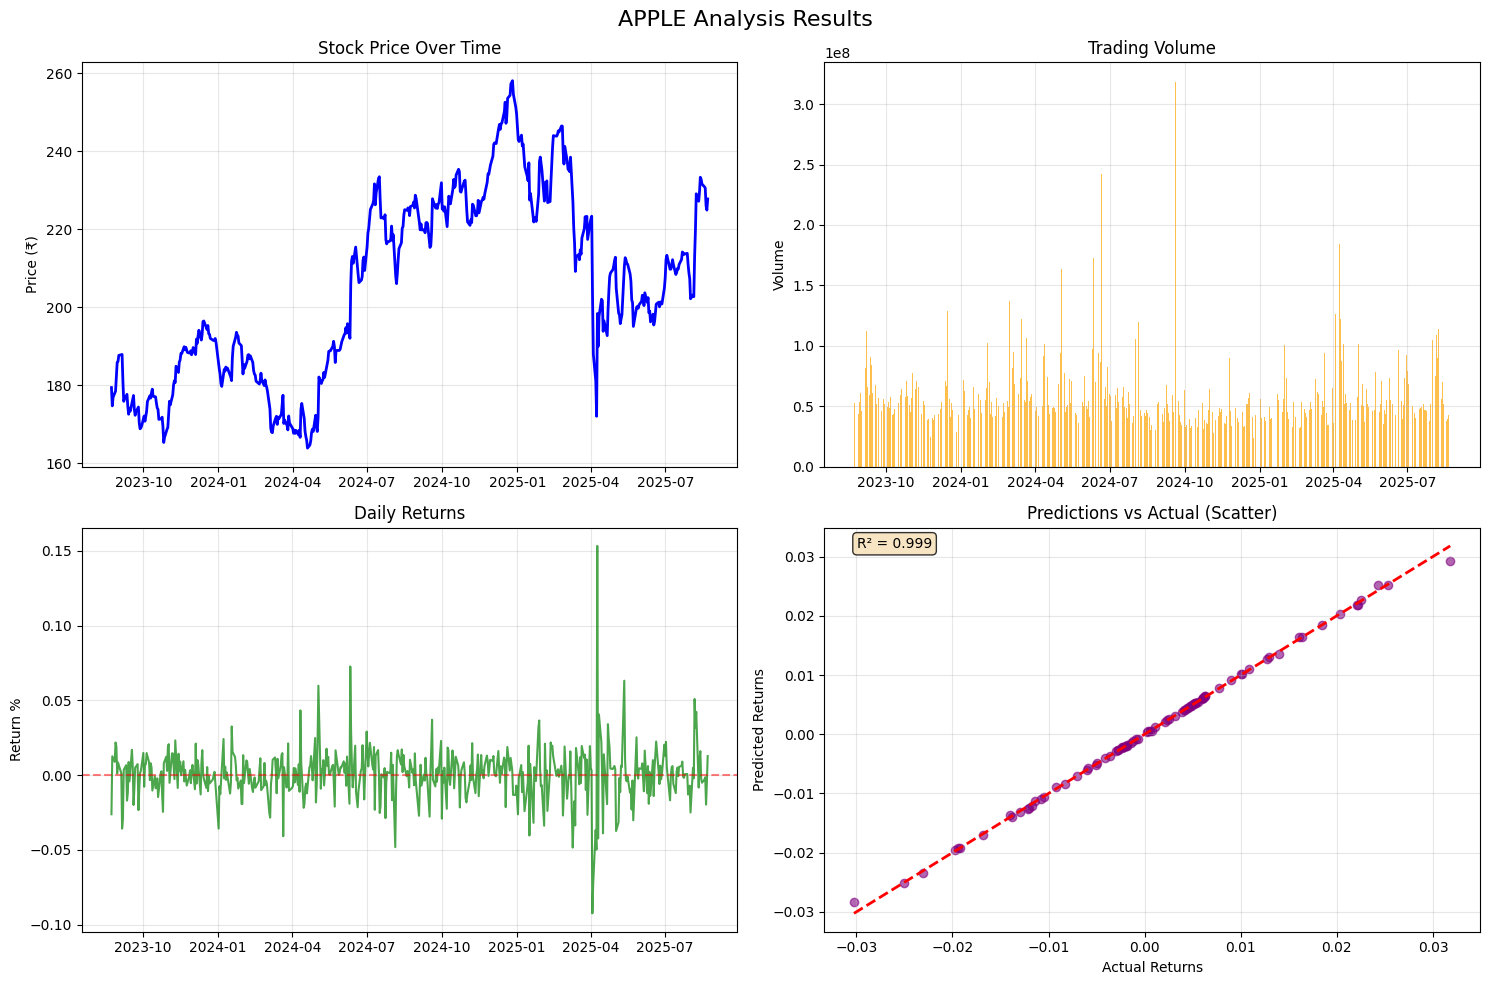


📈 Generating detailed Actual vs Predicted graphs...


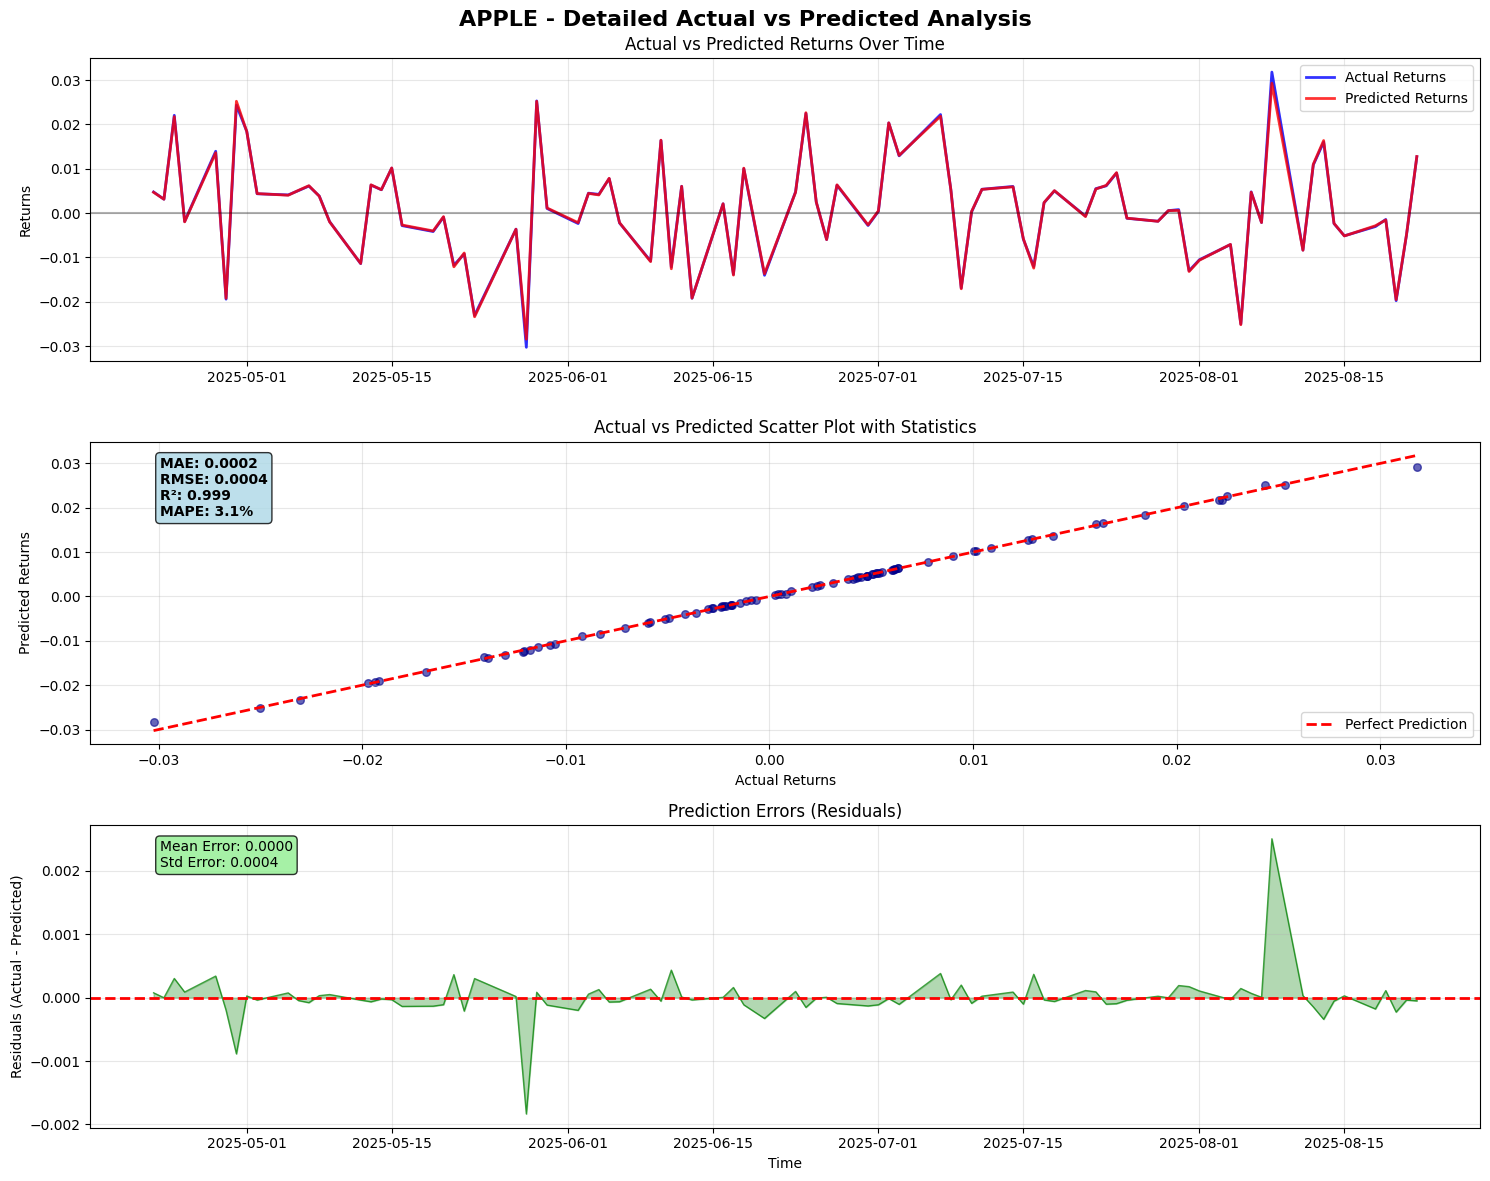


📊 DETAILED PREDICTION STATISTICS FOR APPLE
Mean Absolute Error (MAE):     0.000169
Root Mean Square Error (RMSE): 0.000378
R-squared Score (R²):          0.9990
Mean Absolute Percentage Error: 3.10%
Mean Residual (Bias):          0.000005
Standard Deviation of Errors:  0.000378

🎯 INTERPRETATION:
✅ Good prediction accuracy - Model explains >50% of variance
✅ Excellent error rate - MAPE < 10%


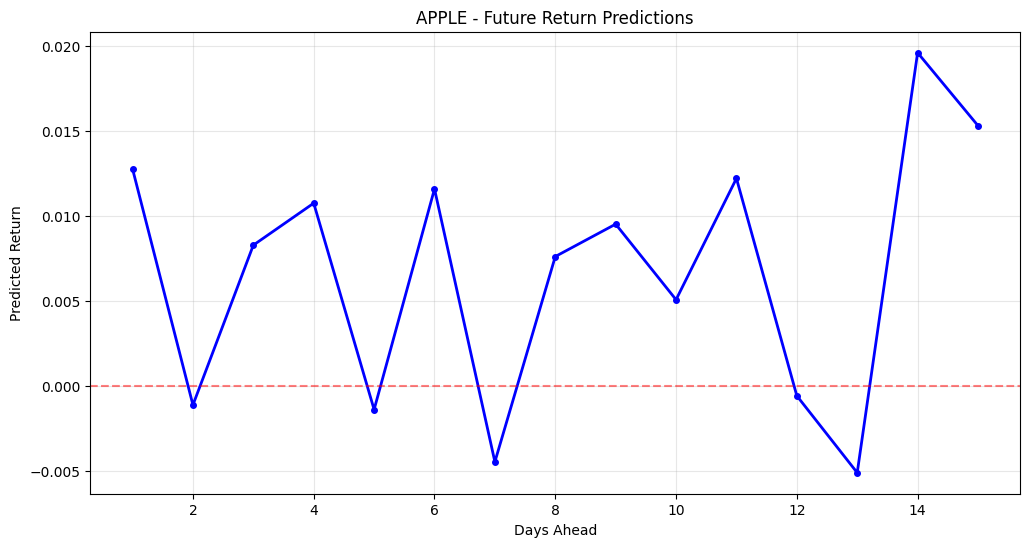


🎯 TRADING SIGNALS FOR NEXT 15 DAYS:
----------------------------------------
Day  1:  0.0128 (  1.28%) -> BUY
Day  2: -0.0011 ( -0.11%) -> HOLD
Day  3:  0.0083 (  0.83%) -> HOLD
Day  4:  0.0108 (  1.08%) -> BUY
Day  5: -0.0014 ( -0.14%) -> HOLD
Day  6:  0.0116 (  1.16%) -> BUY
Day  7: -0.0045 ( -0.45%) -> HOLD
Day  8:  0.0076 (  0.76%) -> HOLD
Day  9:  0.0095 (  0.95%) -> HOLD
Day 10:  0.0051 (  0.51%) -> HOLD

✅ Analysis completed successfully!

==================== TESLA ====================
🚀 Starting ADANI Stock Analysis: TESLA
📊 Fetching GLOBAL data for TESLA (TSLA)...
✅ Successfully loaded 502 days of GLOBAL data
🔧 Creating features...
✅ Created 30 features
📊 Preparing data for training...
✅ Training data: 350 samples
✅ Test data: 88 samples
🤖 Training Random Forest model...

📊 MODEL PERFORMANCE:
Training MAE: 0.000283
Test MAE: 0.000548
Training R²: 0.9996
Test R²: 0.9983

📈 TOP 10 IMPORTANT FEATURES:
log_returns: 0.9970
high_low_pct: 0.0009
volatility_10: 0.0004
volume_ratio: 

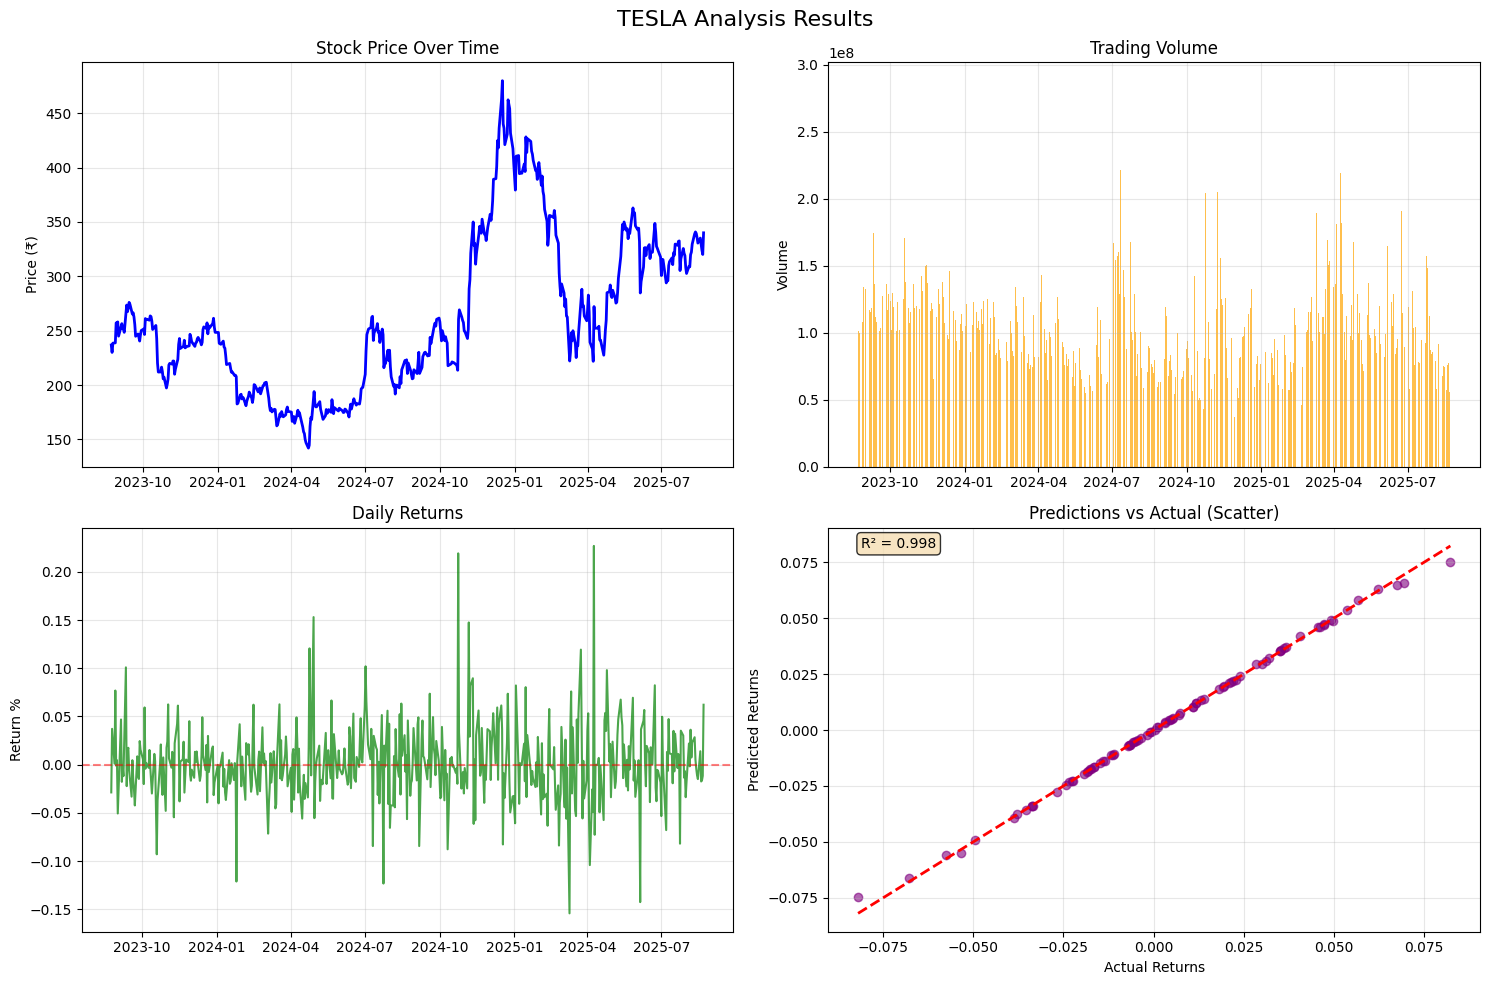


📈 Generating detailed Actual vs Predicted graphs...


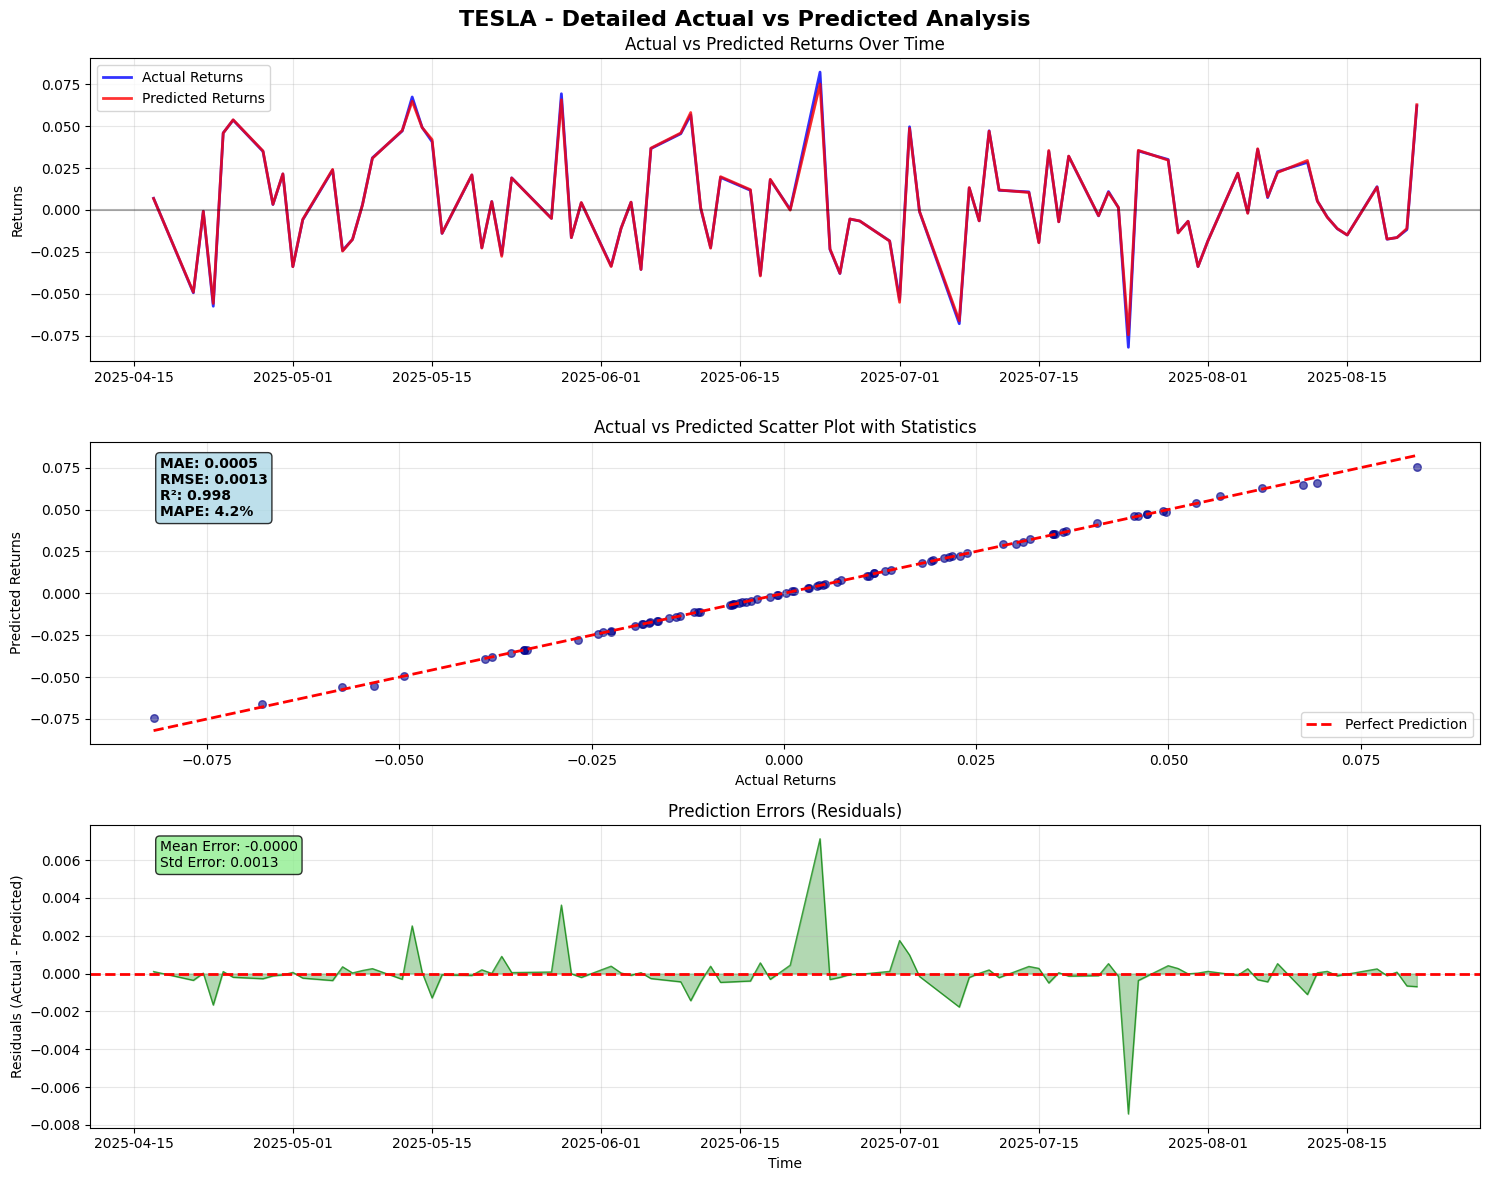


📊 DETAILED PREDICTION STATISTICS FOR TESLA
Mean Absolute Error (MAE):     0.000548
Root Mean Square Error (RMSE): 0.001292
R-squared Score (R²):          0.9983
Mean Absolute Percentage Error: 4.16%
Mean Residual (Bias):          -0.000006
Standard Deviation of Errors:  0.001292

🎯 INTERPRETATION:
✅ Good prediction accuracy - Model explains >50% of variance
✅ Excellent error rate - MAPE < 10%


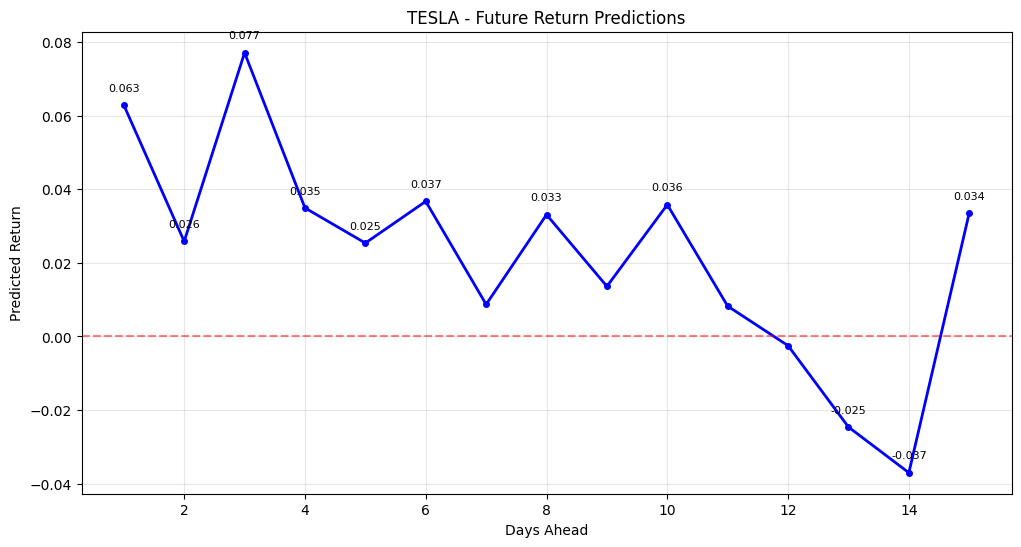


🎯 TRADING SIGNALS FOR NEXT 15 DAYS:
----------------------------------------
Day  1:  0.0629 (  6.29%) -> BUY
Day  2:  0.0258 (  2.58%) -> BUY
Day  3:  0.0771 (  7.71%) -> BUY
Day  4:  0.0349 (  3.49%) -> BUY
Day  5:  0.0254 (  2.54%) -> BUY
Day  6:  0.0367 (  3.67%) -> BUY
Day  7:  0.0087 (  0.87%) -> HOLD
Day  8:  0.0331 (  3.31%) -> BUY
Day  9:  0.0136 (  1.36%) -> BUY
Day 10:  0.0358 (  3.58%) -> BUY

✅ Analysis completed successfully!

==================== MICROSOFT ====================
🚀 Starting ADANI Stock Analysis: MICROSOFT
📊 Fetching GLOBAL data for MICROSOFT (MSFT)...
✅ Successfully loaded 502 days of GLOBAL data
🔧 Creating features...
✅ Created 30 features
📊 Preparing data for training...
✅ Training data: 348 samples
✅ Test data: 87 samples
🤖 Training Random Forest model...

📊 MODEL PERFORMANCE:
Training MAE: 0.000078
Test MAE: 0.000137
Training R²: 0.9997
Test R²: 0.9994

📈 TOP 10 IMPORTANT FEATURES:
log_returns: 0.9988
lower_shadow: 0.0001
return_lag_3: 0.0001
volatilit

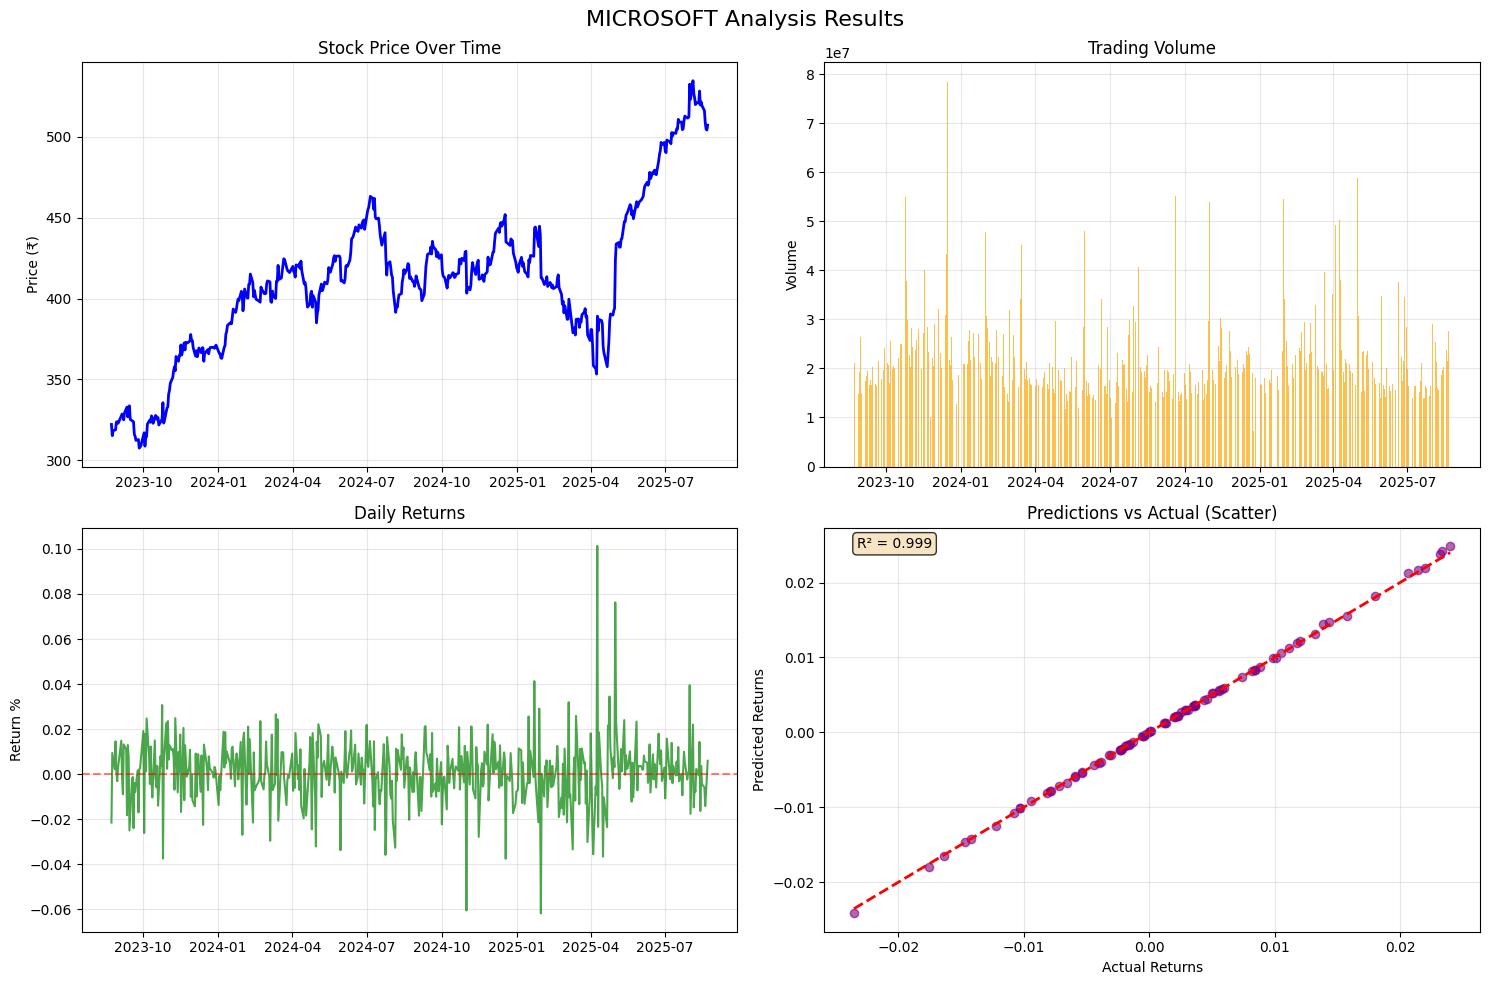


📈 Generating detailed Actual vs Predicted graphs...


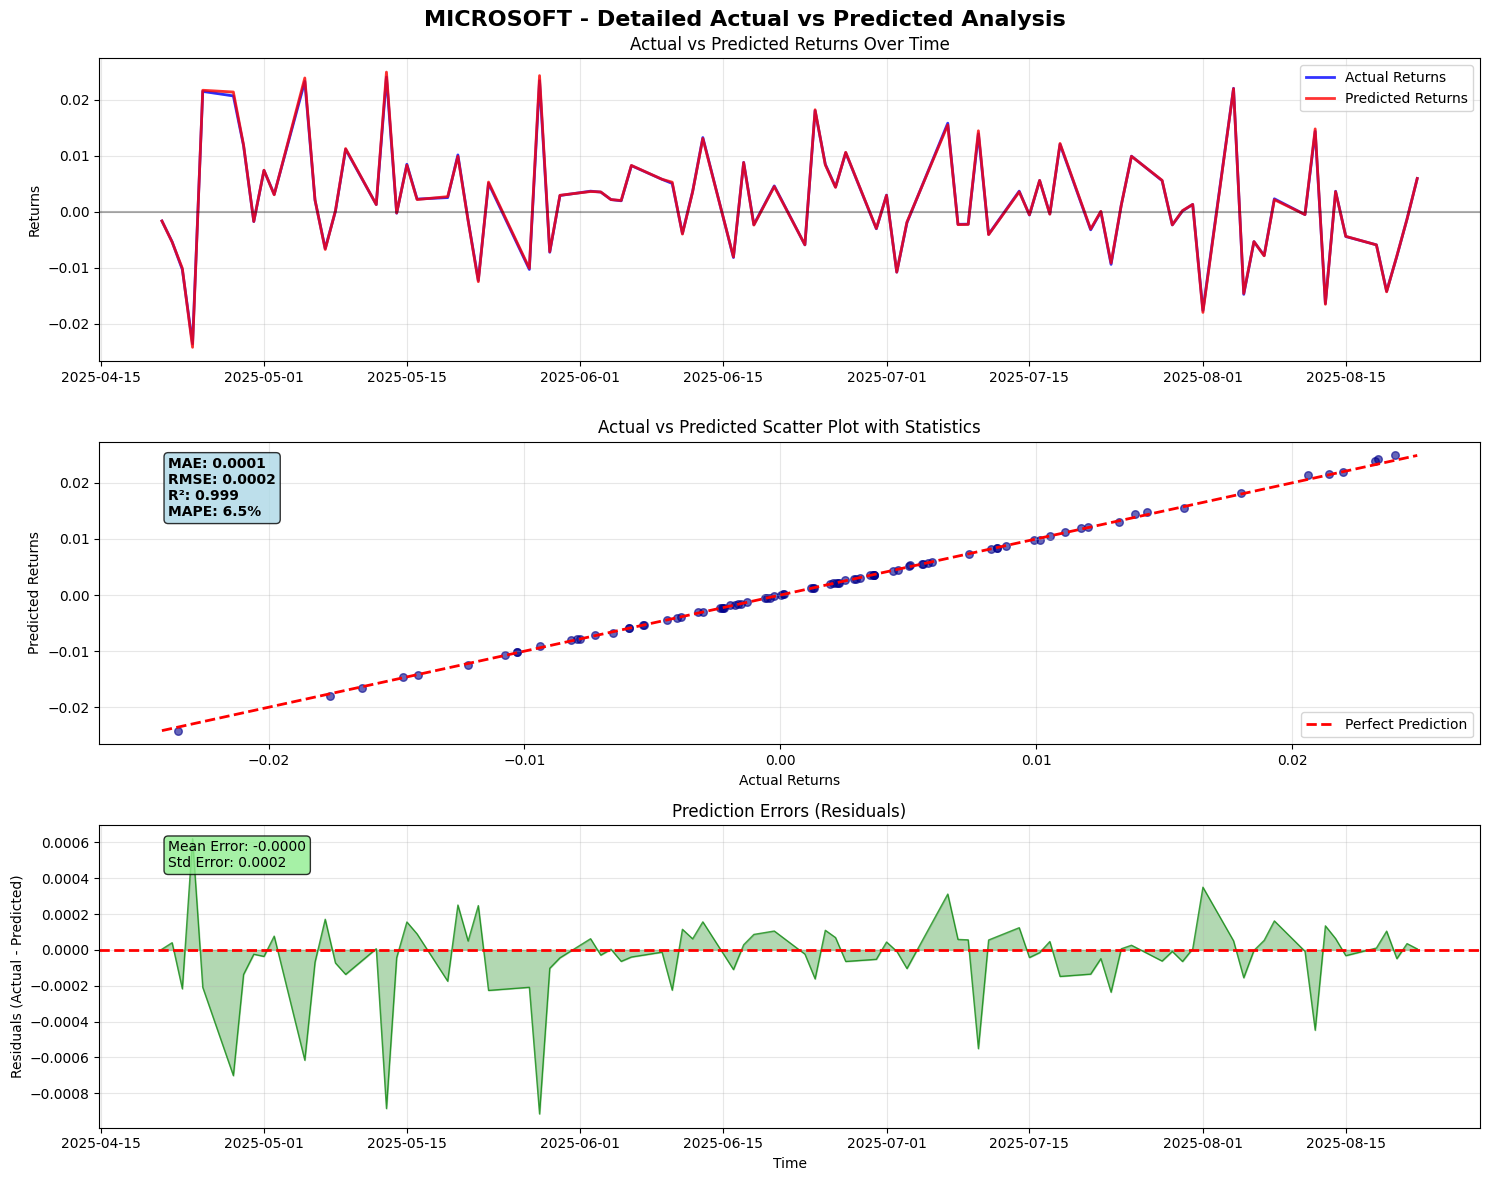


📊 DETAILED PREDICTION STATISTICS FOR MICROSOFT
Mean Absolute Error (MAE):     0.000137
Root Mean Square Error (RMSE): 0.000228
R-squared Score (R²):          0.9994
Mean Absolute Percentage Error: 6.49%
Mean Residual (Bias):          -0.000041
Standard Deviation of Errors:  0.000224

🎯 INTERPRETATION:
✅ Good prediction accuracy - Model explains >50% of variance
✅ Excellent error rate - MAPE < 10%


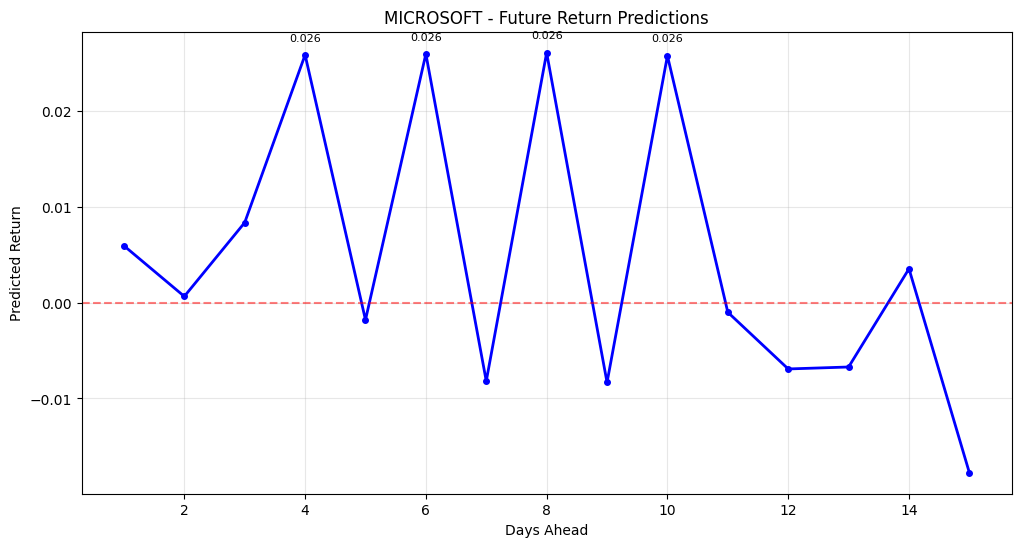


🎯 TRADING SIGNALS FOR NEXT 15 DAYS:
----------------------------------------
Day  1:  0.0059 (  0.59%) -> HOLD
Day  2:  0.0006 (  0.06%) -> HOLD
Day  3:  0.0083 (  0.83%) -> HOLD
Day  4:  0.0258 (  2.58%) -> BUY
Day  5: -0.0018 ( -0.18%) -> HOLD
Day  6:  0.0259 (  2.59%) -> BUY
Day  7: -0.0082 ( -0.82%) -> HOLD
Day  8:  0.0260 (  2.60%) -> BUY
Day  9: -0.0083 ( -0.83%) -> HOLD
Day 10:  0.0257 (  2.57%) -> BUY

✅ Analysis completed successfully!


In [2]:
results = analyze_multiple_stocks(['APPLE', 'TESLA', 'MICROSOFT'])
